# Lab 7: Introduction to Markov chains and random graphs

In this lab we will be looking at Markov Processes.  Below is the code to import the modules we will be using throughout this lab.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
import networkx as nx  # If using your own computer may need to install networkx 
print ("Modules Imported!")

Modules Imported!


## Introduction to Markov Chains:

A Markov chain $(X[t]: t\geq 0)$ is a sequence of random variables such that the distribution of each variable is determined by the random variable before it.  Equivalently, it is a sequence of states visited by a form of finite state machine with random transitions.  To describe how to generate the chain we specify the initial probability distribution $\pi_0$ and a one-step transition probability matrix $P$.   We assume there is a finite state space described by {0,1,, . . . , $n-1$} for some $n$.  The intial distribution, $\pi(0)$, should be a probability vector (nonnegative entries with sum equal to one) of length $n$.   It consists of the probability the process is in a given state at time zero: ${\pi_i(0)} = P\{X[0]=i\}$ for $0\leq i \leq n-1.$    The matrix $P$ is an $n\times n$ matrix such that each row of the matrix is a probability vector.   If the state of the Markov chain at time $t-1$ is $i$ (in other words, if $X[t-1]=i$), then the (conditional) probability distribution of $X[t]$, the state at time $t$, is given by the ith row of $P.$ Additionally, we can look at the individual entries: $p_{ij}=P\left\{X[t]=j \; \big| \; X[t-1]=i\right\}$.  Below is a class that can be used to create a Markov chain.  An object in this class is created with specified values of $\pi_0$ and $P$, and can be used to calculate the state distribution at any time or to generate a sample path (i.e. a variate of the sequence of states) of the Markov chain.  

The state distributions are determined recursively as follows.  If $$\pi_i(t)=P\{X[t]=i\}$$ then by the law of total probability, $$\pi_j(t)= P\{X[t]=j\}=\sum_i P\{X[t-1]=i,X[t]=j\} =\sum_i \pi_i(t-1)p_{i,j}$$  That is, if we view $\pi(t)$ as a row vector for all $t,$ then $\pi(t)=\pi(t-1)P,$  where we have used multiplication of a row vector by a matrix.  (A nice introduction to Markov chains is given on wikipedia.)

In [252]:
# Markov chain object similar to random variable objects in scipy.stats (st)

class Markov_chain:
    def __init__(self, P, pi0):   # The transition probability matrix and initial distribution are passed
        self.P = P 
        self.pi0 = pi0
        self.n=np.size(pi0)
        if np.shape(P) != (self.n,self.n):
            print ("Error: Shape of P doesn't match pi0")
   
    def rvs(self,T):     # produce a length T segment of variates of the random process
        X = [np.random.choice(self.n, p=self.pi0)]
        for t in range(1,T):
            X.append(np.random.choice(self.n, p=self.P[X[t-1],:]))
        return np.array(X)
    
    def pi(self,t):    # produce probability distribution at time t
        pi_new=self.pi0
        for s in range(t):
            pi_new = np.dot(pi_new, P)    # one step update of probability distribution
        return pi_new

# An example of how you can use the class to create and run through a simple two state chain
P=np.array([[0.9,0.1],[0.1,0.9]])
pi0=np.array([0.1,0.9])
print ('Simulated state sequence')
markov=Markov_chain(P,pi0)  
print (markov.rvs(100))
for t in range(20):
    print ("Distribution at time", t, ":", markov.pi(t))

Simulated state sequence
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
Distribution at time 0 : [0.1 0.9]
Distribution at time 1 : [0.18 0.82]
Distribution at time 2 : [0.244 0.756]
Distribution at time 3 : [0.2952 0.7048]
Distribution at time 4 : [0.33616 0.66384]
Distribution at time 5 : [0.368928 0.631072]
Distribution at time 6 : [0.3951424 0.6048576]
Distribution at time 7 : [0.41611392 0.58388608]
Distribution at time 8 : [0.43289114 0.56710886]
Distribution at time 9 : [0.44631291 0.55368709]
Distribution at time 10 : [0.45705033 0.54294967]
Distribution at time 11 : [0.46564026 0.53435974]
Distribution at time 12 : [0.47251221 0.52748779]
Distribution at time 13 : [0.47800977 0.52199023]
Distribution at time 14 : [0.48240781 0.51759219]
Distribution at time 15 : [0.48592625 0.51407375]
Distribution at time 16 : [0.488741 0

We won't go into this deeply, but notice how as the distributions change in time, they appear to be converging. For some Markov chains, there exists a limit for the distribution. If this occurs then the limit distribution $\pi$ satisfies $\pi = \pi P$ and $\pi$ is called an *equilibrium distribution.*

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Imagine that the states {0, . . . , n-1} of a particular Markov chain are the nodes of a ring graph, with state 0 following state n-1.   Create a Markov_chain object for n=6 with inital state 0 (so x[0]=0 with probability one) with the following transition probabilities:  given X[t-1]=i, X[t] is equal to i with probability 0.8 and to i+1 (modulo n) with probability 0.2.
<ol>
<li> Print the first 100 states for a simulation of the chain.</li>
<li> Simulate the chain for 10,000 time units, and calculate the number of complete revolutions the chain makes around the ring, divided by 10,000.  This is an estimate of the long term cycle rate for the Markov chain.  Repeat the experiment ten times to get an idea of the variation from one experiment to the next.</li>
<li> Give an analytical argument for what the long term cycle rate for this Makov chain should be.</li>

In [253]:
# Your code here
# PART 1
pi0=np.array([1.0,0,0,0,0,0])
P =np.array([[0.8,0.2,0,0,0,0],[0,0.8,0.2,0,0,0],[0,0,0.8,0.2,0,0],
             [0,0,0,0.8,0.2,0],[0,0,0,0,0.8,0.2],[0.2,0,0,0,0,0.8]])

print ('Simulated state sequence')
markov=Markov_chain(P,pi0)
print (markov.rvs(100))

# PART 2
T = 10000 # set length of chain
gens = 100 # set the number of generations you would like to simulate 
rev_counter=[] # initialize revolution counter
for i in range(gens):
    markov_T = markov.rvs(T)
    counter = 0
    for t in range(T):
        if t == 0:
            continue
        elif markov_T[t] == 0 and markov_T[t-1] == 5:
            counter+=1
    longterm_cycle_rate = counter/T
    rev_counter.append(longterm_cycle_rate)

print('\nThe long term cycle rates for',gens,'generations of this Markov Chain are:',rev_counter)
print('\nThe average of the rates found is:',round(np.sum(rev_counter)/gens,6))

Simulated state sequence
[0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 4 4 4 4 5 0 0 0 1 2 2 2 3 3 3 3 3
 3 3 3 3 3 4 5 5 5 5 5 5 5 5 5 5 5 0 1 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 5 5 5
 5 5 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3]

The long term cycle rates for 100 generations of this Markov Chain are: [0.0332, 0.0325, 0.0327, 0.0322, 0.0331, 0.0323, 0.034, 0.0337, 0.0335, 0.0333, 0.0337, 0.0327, 0.0335, 0.0336, 0.0316, 0.033, 0.0344, 0.0324, 0.0332, 0.033, 0.0328, 0.0334, 0.0331, 0.0339, 0.0344, 0.0335, 0.0341, 0.0327, 0.0327, 0.032, 0.0328, 0.0339, 0.0332, 0.0339, 0.0337, 0.033, 0.0324, 0.0336, 0.0325, 0.0332, 0.0332, 0.0343, 0.0335, 0.0323, 0.0332, 0.0329, 0.033, 0.0331, 0.0334, 0.0332, 0.0332, 0.0341, 0.0336, 0.0322, 0.0336, 0.0318, 0.033, 0.0327, 0.0338, 0.0323, 0.0339, 0.0329, 0.033, 0.0336, 0.0347, 0.0325, 0.033, 0.0335, 0.0327, 0.033, 0.033, 0.0331, 0.0322, 0.0341, 0.0333, 0.0333, 0.0327, 0.0328, 0.0335, 0.0328, 0.0346, 0.033, 0.0337, 0.033, 0.0344, 0.0343, 0.0336, 0.0343, 0.0336

__Answer:__ I believe that the long term cycle rate of this Markov Chain should be $\frac1{30}$ based on the output of the previous cell. I ran my code for 100 generations instead of 10 and noticed that the average long term cycling rate for this Markov chain approaches $\frac1{30}$. 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## Markov Gibberish

Let's look at some applications of a Markov Chain. When I was younger I remember using AIM (instant messenger) to talk to my friends. At some point people started to create bots which could hold conversations with users. Of course we had fun trying to get them to say things that didn't make sense, but the idea that it could generate somewhat relevant conversations was pretty cool. We're going to build a rudimentary version of that here. The code below generates text based on a large sample text, such that each word is generated based on the two words just before it.  The generated sequence of words is given by a 2-Markov chain (here "2" means that the distribution of the value of each word is determined by the two previous words, instead of just the one previous word).  That means that any three consecutive words in the generated text are also consecutive words somewhere in the sample text.   If words w1 w2 were the last two words added to the generated text string, then to generate the next word we look for all occurrences of w1 w2 as consecutive words in the sample text, and see what word was just after them for each occurrence.   The randomly generated text selects the next word to match one of those occurrences, selected at random with equal probability.

In [254]:
# Based on http://agiliq.com/blog/2009/06/generating-pseudo-random-text-with-markov-chains-u/    --BH
# Next word of random string is selected from possible word that follow the last two words.


class Markov_text2:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def triples(self):
    #Generates triples from the given data string. So if our string were
    # "What a lovely day", we'd generate (What, a, lovely) and then (a, lovely, day)."""
           
        if self.word_size < 3:
            return
         
        for i in range(self.word_size - 2):
            yield (self.words[i], self.words[i+1], self.words[i+2])    #Like return but returns a generator to be used once
               
    def database(self):
        for w1, w2, w3 in self.triples():
            key = (w1, w2)
            if key in self.cache:
                self.cache[key].append(w3)
            else:
                self.cache[key] = [w3]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-3)
        w1, w2 = self.words[seed], self.words[seed+1]  # Initial key is (w1,w2)
        gen_words = [w1,w2]
        for i in range(size):
            w1, w2 = w2, np.random.choice(self.cache[(w1, w2)])
            gen_words.append(w2)
        return ' '.join(gen_words)
                
        
        
file_ = open('Jeeves.txt')
markov = Markov_text2(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

# The above has a slight bug.   It is possible for the key to be the
# last two words in the text file and have no entry in the dictionary.
# This won't happen if the last two words in the text file appear
# consecutively somewhere else in the file.   -BH

'to bed when it comes to the club, and I over\'eard \'im plotting to put dear Motty with me, I come within a week. Till then Tootles can stop with Mr. Bickersteth and yourself has, unfortunately, not answered entirely satisfactorily, sir." "Surely the duke believes that Mr. Thistleton was soon going to be wading into the luny-bin, you simply explain that, when you may be stored, may contain "Defects," such as, but not bright." "All right, Jeeves." I said it was supposed that he had slit the waistcoat up the gangway. "Halloa, George!" I said. It flashed across me that this was'

In [255]:
# Based on http://agiliq.com/blog/2009/06/generating-pseudo-random-text-with-markov-chains-u/    --BH
# Next word of random string is selected from possible word that follow the last two words.


class Markov_text1:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def singles(self):
    #Generates doubles from the given data string. So if our string were
    # "A lovely day", we'd generate (A, lovely) and then (lovely, day)"""
           
        if self.word_size < 2:
            return
         
        for i in range(self.word_size - 1):
            yield (self.words[i], self.words[i+1])    #Like return but returns a generator to be used once
               
    def database(self):
        for w1, w2 in self.singles():
            key = (w1)
            if key in self.cache:
                self.cache[key].append(w2)
            else:
                self.cache[key] = [w2]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-2)
        w1= self.words[seed] # Initial key is (w1)
        gen_words = [w1]
        for i in range(size):
            w1 = np.random.choice(self.cache[(w1)])
            gen_words.append(w1)
        return ' '.join(gen_words)
                
        
        
file_ = open('Jeeves.txt')
markov = Markov_text1(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

# The above has a slight bug.   It is possible for the key to be the
# last two words in the text file and have no entry in the dictionary.
# This won't happen if the last two words in the text file appear
# consecutively somewhere else in the file.   -BH

'him a pipe and nearly ran his grace in all there." He seemed to come back. My next morning, and they fetch you want to give it seemed to such a way. "He will not drive chappies in that Mr. George Lattaker?" "Yes," I think you\'re a bit. "He\'s right! Jeeves, she said. "Buck along, laddie." I should love dadda?\' isn\'t she?" "Certainly she looked at the result that kid\'s uncle could turn in a hole, Bertie. I took another Classical picture. It was up on the money for rich uncle at me. Young man, perfectly topping! I called some things?"'

In [256]:
# Based on http://agiliq.com/blog/2009/06/generating-pseudo-random-text-with-markov-chains-u/    --BH
# Next word of random string is selected from possible word that follow the last two words.


class Markov_text3:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def quadruples(self):
    #Generates triples from the given data string. So if our string were
    # "What a lovely day it is", we'd generate (What, a, lovely, day) and then (a, lovely, day, it)."""
           
        if self.word_size < 4:
            return
         
        for i in range(self.word_size - 3):
            yield (self.words[i], self.words[i+1], self.words[i+2], self.words[i+3])    #Like return but returns a generator to be used once
               
    def database(self):
        for w1, w2, w3, w4 in self.quadruples():
            key = (w1, w2, w3)
            if key in self.cache:
                self.cache[key].append(w4)
            else:
                self.cache[key] = [w4]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-4)
        w1, w2, w3 = self.words[seed], self.words[seed+1], self.words[seed+2]  # Initial key is (w1,w2,w3)
        gen_words = [w1,w2,w3]
        for i in range(size):
            w1, w2, w3 = w2, w3, np.random.choice(self.cache[(w1, w2, w3)])
            gen_words.append(w3)
        return ' '.join(gen_words)
                
        
        
file_ = open('Jeeves.txt')
markov = Markov_text3(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

# The above has a slight bug.   It is possible for the key to be the
# last two words in the text file and have no entry in the dictionary.
# This won't happen if the last two words in the text file appear
# consecutively somewhere else in the file.   -BH

'look of relief came into the poor chappie\'s sorrow. Besides, I\'m bound to say I didn\'t get this for a moment. "Look out for a chance to breathe. I haven\'t breathed since half-past seven. Thank Heaven, Jeeves managed to get out and buy me a collar that fitted, or I should be wanting to go back to your room." It sounded simple enough. "And as to the picture itself--when I\'ve got it?" "Burn it. I\'ll see that you have a brother Alfred." "And Alfred will be there to back you up that you have reached your twenty-fifth birthday. You have doubtless heard your'

With punctuation and everything, this initially looks like a bit of a mess. However, the sentences themselves are coming together and can make a little bit of sense. It is a very primitive version of those bots on instant messaging.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using the class above, do the following:
<ol><li> Find your own text file or copy and paste from somewhere and use the text to create gibberish from that. To work well, your file really needs to contain a large amount of text. The "Jeeves" file was pulled from a short story. Print out your own 100 word gibberish paragraph based on the text file you used.</li>
<li> Rewrite the code to create a 1-Markov Chain of the words instead of the 2-Markov Chain given above. Print out your own 100 word gibberish paragraph from this.</li>
<li> Rewrite the code to create a 3-Markov Chain of the words instead of the 2-Markov Chain given above. Print out your own 100 word gibberish paragraph from this.</li>
<li> Comment on the qualitative differences of your paragraphs using these methods.</li>

In [257]:
# Your code here (add additional code cells if necessary)
# PART 1
file_ = open('mobydick.txt')  
markov = Markov_text2(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

'all his bodily peculiarities as distinguished from other tribes of his were at times you do ? " cried another of the Grand Jury.\' And with that, Peleg hurried him over the bulwarks ; and .only by inference is it you stare at ? Those chaps in yonder boat ? \' turning to me. It was a reality or a foot too narrow, and the Unicorn whale. He is mostly found in the wind for Tahiti, five hundred gold coins for the bottom of the main. But no longer to retreat, bethinking him of courting notoriety by any eyes not permitted to'

In [258]:
# PART 2 (1-Markov Chain of the words instad of the 2-Markov Chain)
file_ = open('mobydick.txt')  
markov = Markov_text1(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

"adhering to it, faintly representing the character of this effeminacy is in patent chairs. And when I must only a pig to tell Quohog to solace to her. So down here was almost solely consists in any other leviathans of waves had concluded by which had been still molest the sea as he was used by its way distinguished from other means of the most gamesome and English. Though, upon it. First Congregational Church/ cried the voyage. Or at the continual sight ! Let me a laugh ? ' Depend upon the Pequod sharply bowed to God, contenting himself made no"

In [259]:
# PART 3 (3-Markov Chain of the words intead of the 2-Markov Chain)
file_ = open('mobydick.txt')  
markov = Markov_text3(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

'clothes, lighted his pipe, and leaning against the spiles ; some seated upon the pier-heads ; some looking over Vhe bulwarks of ships from China ; some high aloft in the cross-trees was that mad Gay-Header, Tashtego. His body was reaching eagerly forward, his hand stretched out like a wand, and at brief sudden intervals he continued his cries. To be sure, it might be said, only arises from the fair estimation of the encountered peril, but that an utterly fearless man is a far more barbaric, heathenish, and motley set than any of the tame merchant-ship companies which 151 152 MOBY-DICK my'

__Answer:__ The difference between these three cases of Markov chains is very obvious. 

When we compare the 1-Markov Chain to the 2-Markov Chain, the 1-Markov Chain looks like absolute gibberish in every sense of the word. Nothing is coherent about the sentence structure and it seems like an 8 year old wrote it. Furthermore, when we compare the 3-Markov Chain text with the 2-Markov Chain text, using 3 previous words as a key instead of 2 previous words improves our sentence structure and makes it look like the text was literally drawn from the book. Now Moby Dick is already confusing, and even though the Markov Chain using 3 previous words still does not paint a vivid picture, it does the job a lot better than the other two cases.

In sum, it looks like the general pattern of Markov Gibberish is that when we increase the number of previous words that play a role in the creation of the next word, the accuracy of our automated texts increases. However, there must certaintly be some sort of saturation point. For example, say after looking at the previous 5 words, the accuracy of your bot's next word is relatively constant. 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Random Graphs and Working with Graphs

Markov chains that are time independent and finite can be represented really well by graphs. I'm sure you've used finite state machines to describe processes or sequences in some of your other classes. They can also be useful in analyzing or describing networks. Networkx is an extensive Python package for generating and analyzing graphs (the kind with nodes and edges) and can also plot them.  The following code adapted from the networkx webpage generates a random undirected graph by placing nodes at random locations within the unit square and connecting nodes together if their distance is less than a specified threshold.

The center node is located at: 0.5493080066521077 , 0.48814766947569166
The graph is not connected


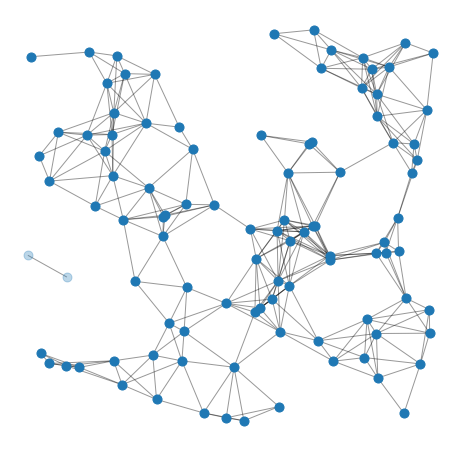

In [260]:
#import networkx as nx  DEBUGGING

d=0.16 # distance threshold, pairs of nodes within distance d are connected by an edge
G=nx.random_geometric_graph(100,d)  #100 nodes in unit square, distance threshold d
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')  # pos is a dictionary, with the indices as keys, ranging from 0 to 99

# find node nearest to (0.5,0.5), called the center node
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

print ('The center node is located at:', pos[ncenter][0], ',', pos[ncenter][1])
# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)  #p is dictionary: keys are nodes, values are distances to center
                                                    #Node not connected to the center node are not listed in p.
                                                    # p include the center node itself.


if nx.is_connected(G):   # The Networkx method is_connected checks for connectness
    print ("The graph is connected")
else: print ("The graph is not connected")

plt.figure(figsize=(8,8))
#nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)  #All edges are drwn
nx.draw_networkx_edges(G,pos,alpha=0.4)  #All edges are drwn
nx.draw_networkx_nodes(G,pos,alpha=0.3,node_size=80)  #All nodes are drawn but nearly transparent
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),   # Nodes connected to center node are drawn, closer nodes have darker color
                       node_size=80)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

Excellent documentation for NetworkX is available online (search for NetworkX documentation). We find a plethora of classes for generating both undirected graphs (no arrows on the edges) and directed graphs.   Run the code in the above cell a few dozen times, and see how often the graph generated is *connected*, meaning that there is a path through the graph from any node to any other node.   One way a graph could be not connnected is to have an isolated node, which is a node with no neighbors.   Also, try changing the value of the threshold d and seeing the effect on connectivity.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>**   Estimate the probability of connectivity for the above model (100 nodes at random locations in unit square with edges between pairs of nodes at distance d or smaller) for values of d in 0.10, 0.11, . . . , 0.20 by generating 1000 instances for each d and seeing the fraction of them that are connected. Is there a sort of threshold where the odds of a connected graph jumps significantly?

In [261]:
# Your code here
# Initialization 
list_d = [0.10+0.01*d for d in range(0,11)]
list_d = list(np.around(np.array(list_d),2))

num_nodes = 100
instances = 1000
gbl_counter = []

# For loop to iterate through all d values 1000 (number of instances) number of times
for d in list_d:
    counter = 0
    for inst in range(instances):
        G=nx.random_geometric_graph(num_nodes,d)
        if nx.is_connected(G):
            counter+=1
    gbl_counter.append(counter/instances)
            
graph_connectedness = {key: gbl_counter[index] for index,key in enumerate(list_d)}
print(graph_connectedness)

{0.1: 0.0, 0.11: 0.0, 0.12: 0.002, 0.13: 0.02, 0.14: 0.122, 0.15: 0.313, 0.16: 0.498, 0.17: 0.678, 0.18: 0.789, 0.19: 0.901, 0.2: 0.928}


__Answer:__ 

It looks like when the threshold distance,d, goes from 0.15 to 0.16, the probability jumps ~20%, the most substantial jump in probability within the entire list.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

The probability of connectivity can be approximately computed analytically as follows.  You might have noticed in the simulations that the main cause of disconnectivity is having at least one isolated node (no neighbors).

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>**   Consider the same model.  Imagine that 100 nodes, numbered from 1 to 100, are independently placed in the unit square with a uniform distribution for each node, and then edges are placed between pairs of nodes at distance d or smaller.  Except for the second half of the fourth part below, your answers should be an expression involving $d.$   No computation is required.
<ol><li> Focus on node 1. Suppose for simplicity it is not near the boundary of the square, so the entire disk of radius $d$ around the node is in the square.   What is the probability that a given other node (say, node 2) is *not* within distance $d$ of node 1?
<li>  What is the probability node 1 is isolated (i.e. *none* of the other nodes is within distance $d$ of node 1)?
<li>  What is the expected number of isolated nodes?
<li>  Assume (this is a reasonable approximation) the total number of isolated nodes has the Poisson distribution with mean given by the answer to the previous problem part.   What is the probability that there are no isolated nodes?
Compute the numerical values for  d in 0.10, 0.11, . . . , 0.20 and compare to the estimated probability the
graph is connected in Problem 3. </ol>

__Answer:__ 

1. Each node is independently placed in the unit square with a uniform distribution for each node. The area of the state space is $1 unit^2$ and the area that node n+1 must be in is $A = πd^2\ units^2$ so that it will be connected to the $nth$ node. Dividing the area of the disk of radius d by the area of the state space yields the area of the disk of radius d. Therefore, the probability that a given other node is not within distance d of node 1 is:

P{Node n is not connected to Node n-1} = $$1 - \pi d^2$$

2. The answer to this problem is simply the probability formula calculated above to the power of how many nodes we are placing in our unit square. Therefore, the probability that node 1 is isolated from all other 99 nodes is:

P{Node n is not connected to all other Nodes} = $$(1 - \pi d^2)^{n-1}$$

3. $$E[X] = n(1-\pi*d^2)^{n-1}$$


4. $p(k) = \frac{e^{-\lambda}*\lambda^k}{k!} $ and $ E[X]=\lambda$. Substituting and simplifying gives 
$p(k = 0) = e^{-n(1-\pi*d^2)^{n-1}}$

    When we use the Poisson distribution to model whether or not our graph will be connected depending on certain values of d, the Poisson distribution overestimates the probability of connectedness. It is not until we get into the upper part of list_d when the probabilities start to match up better

In [262]:
# Your code here (if necessary)
n = 100
p_k_equals_zero = [np.exp(-n*(1-np.pi*(d**2))**(n-1)) for d in list_d]

for index,d in enumerate(list_d):
    print('The probability that our graph is connected when d=',d,'using the Poisson distribution is:',p_k_equals_zero[index],'\n')
    print('The empirical probability is:\n'+str(graph_connectedness[d]))

The probability that our graph is connected when d= 0.1 using the Poisson distribution is: 0.014375382556273152 

The empirical probability is:
0.0
The probability that our graph is connected when d= 0.11 using the Poisson distribution is: 0.11573548129613277 

The empirical probability is:
0.0
The probability that our graph is connected when d= 0.12 using the Poisson distribution is: 0.35976906692722066 

The empirical probability is:
0.002
The probability that our graph is connected when d= 0.13 using the Poisson distribution is: 0.6368236824267614 

The empirical probability is:
0.02
The probability that our graph is connected when d= 0.14 using the Poisson distribution is: 0.8309712238173423 

The empirical probability is:
0.122
The probability that our graph is connected when d= 0.15 using the Poisson distribution is: 0.9319422565913525 

The empirical probability is:
0.313
The probability that our graph is connected when d= 0.16 using the Poisson distribution is: 0.97546667159058

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

## Lab Questions:

Make sure to complete all lab questions 1-4 for this weeks lab.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 